In [49]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [63]:
df = pd.read_csv('D:\\Data Science\\Code basics\\py-master\\ML\\FeatureEngineering\\2_outliers_z_score\\Exercise\\bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [64]:
df.shape

(13200, 7)

In [65]:
pd.set_option('display.max_columns',16)

In [66]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [67]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [68]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001,0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000098)

In [69]:
df[df.price_per_sqft > max_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [70]:
df[df.price_per_sqft < min_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [71]:
df2 = df[(df.price_per_sqft < max_thresold) & (df.price_per_sqft > min_thresold)]
df2.shape

(13172, 7)

In [72]:
df.shape

(13200, 7)

In [73]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


## Removing outlier using 3 STD

In [74]:
upper_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
upper_limit

23227.73653589429

In [75]:
lower_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
lower_limit

-9900.429065502549

In [76]:
df2[(df2.price_per_sqft > upper_limit) | (df2.price_per_sqft < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [77]:
df3 = df2[(df2.price_per_sqft < upper_limit) & (df2.price_per_sqft > lower_limit)]

In [78]:
df3.shape

(13047, 7)

In [87]:
df2.shape[0] - df3.shape[0]

125

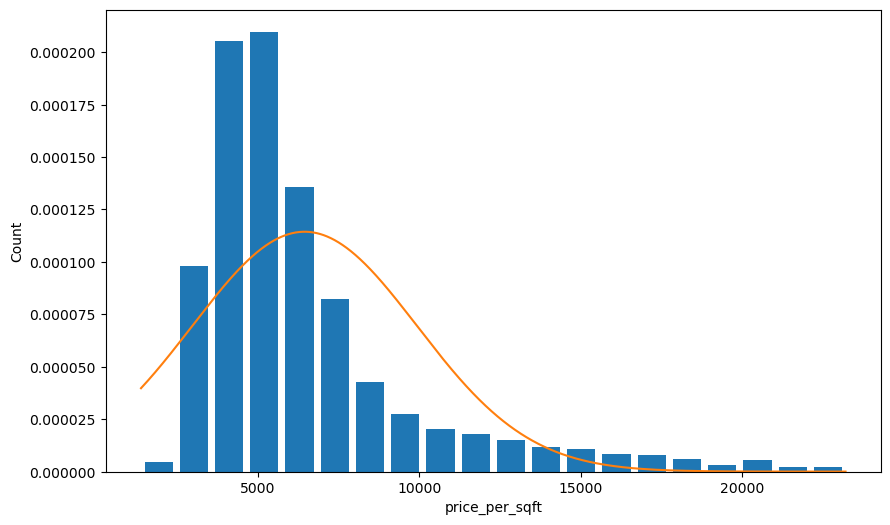

In [80]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density = True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(df3.price_per_sqft.min(), df3.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

# it shows the bell curve

## Using z-score to remove outlier at df2

In [81]:
df2['zscore'] = (df.price_per_sqft - df.price_per_sqft.mean())/df.price_per_sqft.std()
df2.head()

C:\Users\Ajith\AppData\Local\Temp\ipykernel_6104\1608910373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df.price_per_sqft - df.price_per_sqft.mean())/df.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390


In [88]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(0, 8)

In [82]:
df2[df2.zscore > 4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [83]:
df2[df2.zscore < -4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [90]:
df_z = df2[(df2.zscore < 4) & (df2.zscore > -4)]
df_z.shape

(13172, 8)

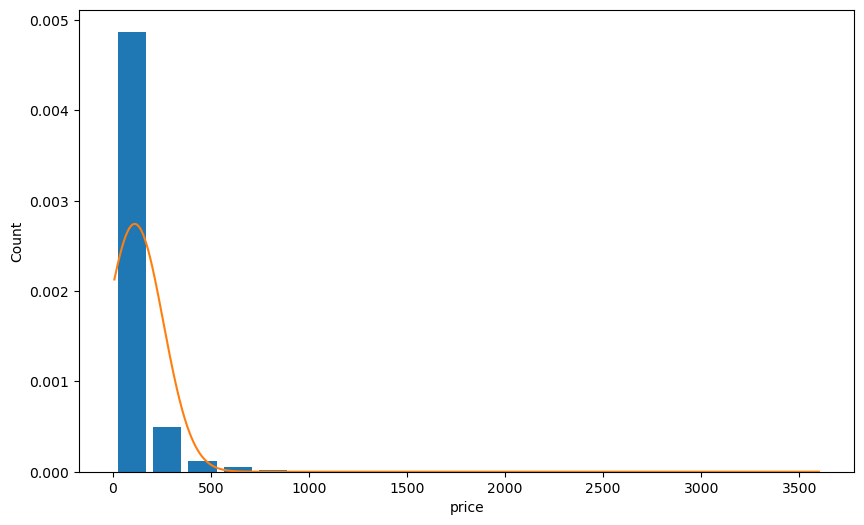

In [85]:
from scipy.stats import norm
import numpy as np

plt.hist(df_z.price, bins=20, rwidth=0.8, density = True)
plt.xlabel('price')
plt.ylabel('Count')

rng = np.arange(df_z.price.min(), df_z.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df_z.price.mean(), df_z.price.std()))

# it shows the bell curve

In [89]:
## Comparing the shape
print(df.shape[0]-df2.shape[0])
print(df.shape[0]-df3.shape[0])
print(df.shape[0]-df_z.shape[0])

28
153
28
